<a href="https://colab.research.google.com/github/ecegirtine/Smoking-Prediction/blob/main/SmokingTahminleme.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_vericopy=pd.read_csv('/content/drive/MyDrive/train_dataset.csv')
test_vericopy=pd.read_csv('/content/drive/MyDrive/test_dataset.csv')

train_veri=train_vericopy.copy()
test_veri=test_vericopy.copy()

In [ ]:
train_veri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38984 entries, 0 to 38983
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  38984 non-null  int64  
 1   height(cm)           38984 non-null  int64  
 2   weight(kg)           38984 non-null  int64  
 3   waist(cm)            38984 non-null  float64
 4   eyesight(left)       38984 non-null  float64
 5   eyesight(right)      38984 non-null  float64
 6   hearing(left)        38984 non-null  int64  
 7   hearing(right)       38984 non-null  int64  
 8   systolic             38984 non-null  int64  
 9   relaxation           38984 non-null  int64  
 10  fasting blood sugar  38984 non-null  int64  
 11  Cholesterol          38984 non-null  int64  
 12  triglyceride         38984 non-null  int64  
 13  HDL                  38984 non-null  int64  
 14  LDL                  38984 non-null  int64  
 15  hemoglobin           38984 non-null 

Veri setimizin sayısal değerlerden oluştuğunu görüyoruz.


In [ ]:
train_veri.head()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,35,170,85,97.0,0.9,0.9,1,1,118,78,...,70,142,19.8,1,1.0,61,115,125,1,1
1,20,175,110,110.0,0.7,0.9,1,1,119,79,...,71,114,15.9,1,1.1,19,25,30,1,0
2,45,155,65,86.0,0.9,0.9,1,1,110,80,...,57,112,13.7,3,0.6,1090,1400,276,0,0
3,45,165,80,94.0,0.8,0.7,1,1,158,88,...,46,91,16.9,1,0.9,32,36,36,0,0
4,20,165,60,81.0,1.5,0.1,1,1,109,64,...,47,92,14.9,1,1.2,26,28,15,0,0


In [ ]:
unique_left_eyesight = sorted(train_veri['eyesight(left)'].unique())
unique_right_eyesight = sorted(train_veri['eyesight(right)'].unique())

print("Unique değerler eyesight(left):", unique_left_eyesight)
print("Unique değerler eyesight(right):", unique_right_eyesight)


Unique değerler eyesight(left): [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.5, 1.6, 1.8, 1.9, 2.0, 9.9]
Unique değerler eyesight(right): [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.5, 1.6, 2.0, 9.9]


In [ ]:
unique_left_hearing = sorted(train_veri['hearing(left)'].unique())
unique_right_hearing = sorted(train_veri['hearing(right)'].unique())

print("Unique değerler hearing(left):", unique_left_hearing)
print("Unique değerler hearing(right):", unique_right_hearing)


Unique değerler hearing(left): [1, 2]
Unique değerler hearing(right): [1, 2]


eyesight(left)	eyesight(right)	hearing(left)	hearing(right) değerlerinin kategorik değişkenler olduğunu görüyoruz.


In [ ]:
pd.set_option('display.float_format', '{:.3f}'.format)
train_veri.describe().T

,count,mean,std,min,25%,50%,75%,max
age,38984.000,44.128,12.064,20.000,40.000,40.000,55.000,85.000
height(cm),38984.000,164.689,9.188,130.000,160.000,165.000,170.000,190.000
weight(kg),38984.000,65.939,12.897,30.000,55.000,65.000,75.000,135.000
waist(cm),38984.000,82.062,9.327,51.000,76.000,82.000,88.000,129.000
eyesight(left),38984.000,1.015,0.499,0.100,0.800,1.000,1.200,9.900
eyesight(right),38984.000,1.009,0.494,0.100,0.800,1.000,1.200,9.900
hearing(left),38984.000,1.025,0.157,1.000,1.000,1.000,1.000,2.000
hearing(right),38984.000,1.026,0.160,1.000,1.000,1.000,1.000,2.000
systolic,38984.000,121.476,13.644,71.000,112.000,120.000,130.000,233.000
relaxation,38984.000,75.994,9.659,40.000,70.000,76.000,82.000,146.000


In [ ]:
train_veri.isna().sum()

age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
dental caries          0
smoking                0
dtype: int64

Boş değerimiz olmadığını görüyoruz.

In [ ]:
train_veri.columns

Index(['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)',
       'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic',
       'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride',
       'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST',
       'ALT', 'Gtp', 'dental caries', 'smoking'],
      dtype='object')

In [ ]:
train_veri.shape

(38984, 23)

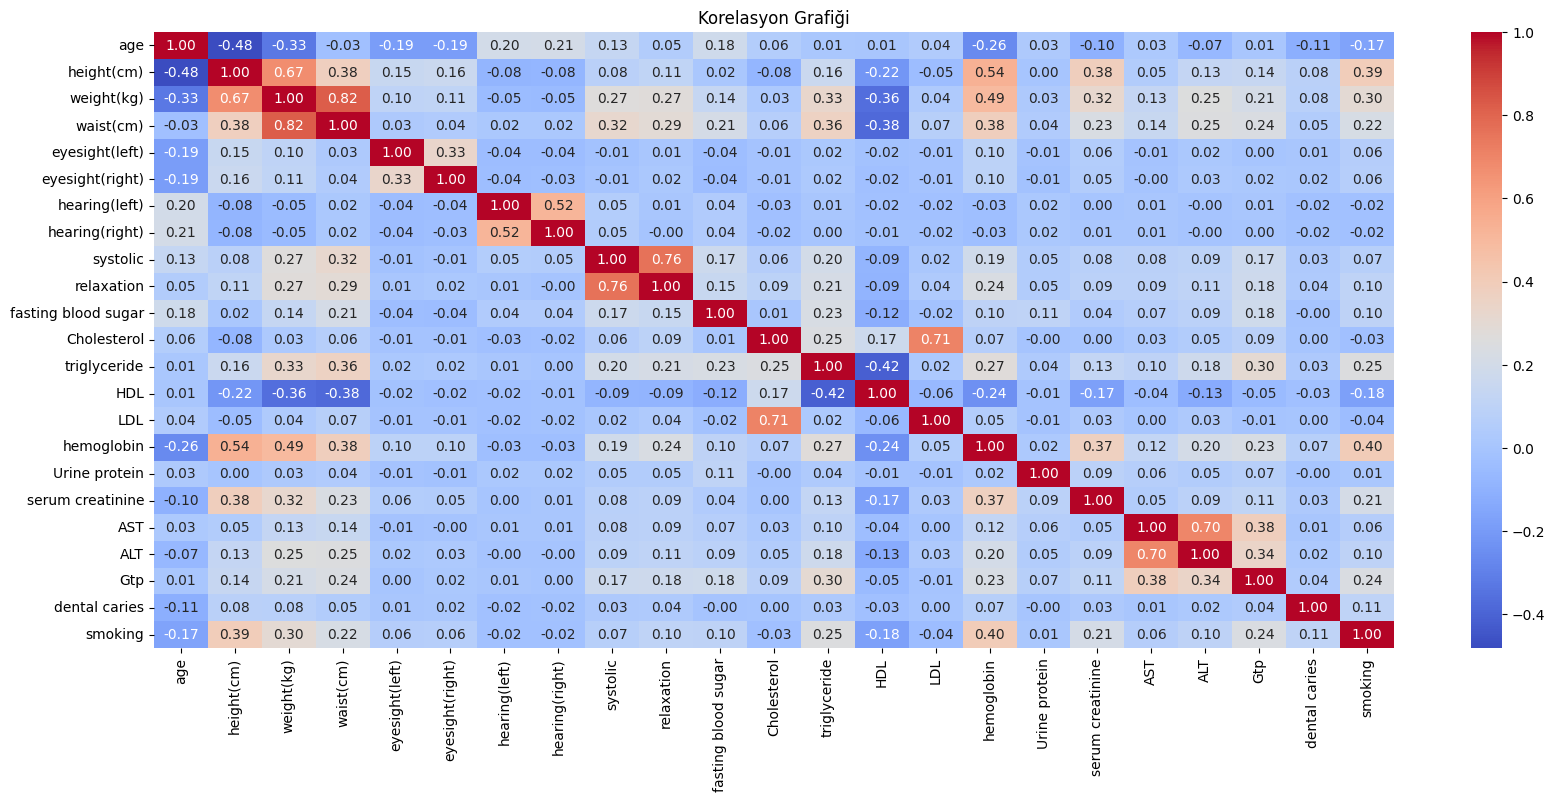

In [ ]:
plt.figure(figsize=(20, 8))
sns.heatmap(train_veri.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korelasyon Grafiği')
plt.show()

Korelasyon grafiğine baktığımızda 'smoking' ile 'age','height','weight','waist','triglyceride','hemoglobin','serum creatinine','gtp','dental caries' özellikleri arasında dieğr özelliklere göre daha fazla ve pozitif bir ilişki görüyoruz. 'HDL' ve 'age' ile de negatif bir ilişki olduğunu görüyoruz.Çok fazla değişkenimiz olduğundan ikili olarak incelemek daha sağlıklı olacaktır.


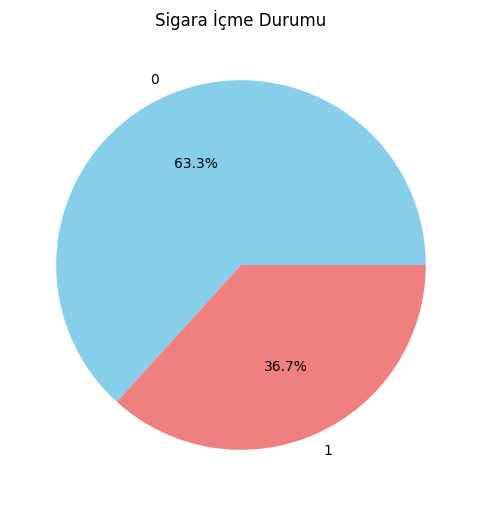

In [ ]:
smoking_percentage = train_veri['smoking'].value_counts(normalize=True) * 100
plt.figure(figsize=(8, 6))
plt.pie(smoking_percentage, labels=smoking_percentage.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Sigara İçme Durumu')
plt.show()

Sigara içmeyen kişilerin oranının daha fazla olduğunu görüyoruz.


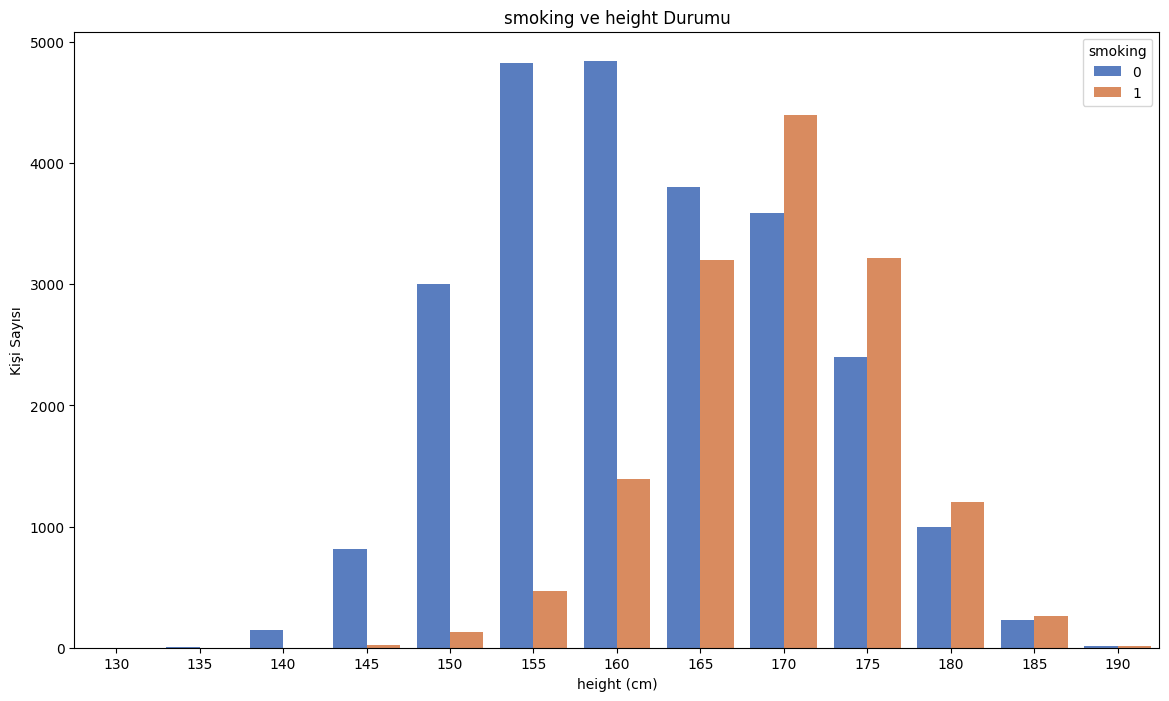

In [ ]:
plt.figure(figsize=(14, 8))
sns.countplot(data=train_veri, x='height(cm)', hue='smoking', palette='muted')
plt.title('smoking ve height Durumu')
plt.xlabel('height (cm)')
plt.ylabel('Kişi Sayısı')
plt.show()

170 ve üzerindeki kişilerin sigara içenlerin oranının içmeyenlere göre daha fazla olduğunu görüyoruz.


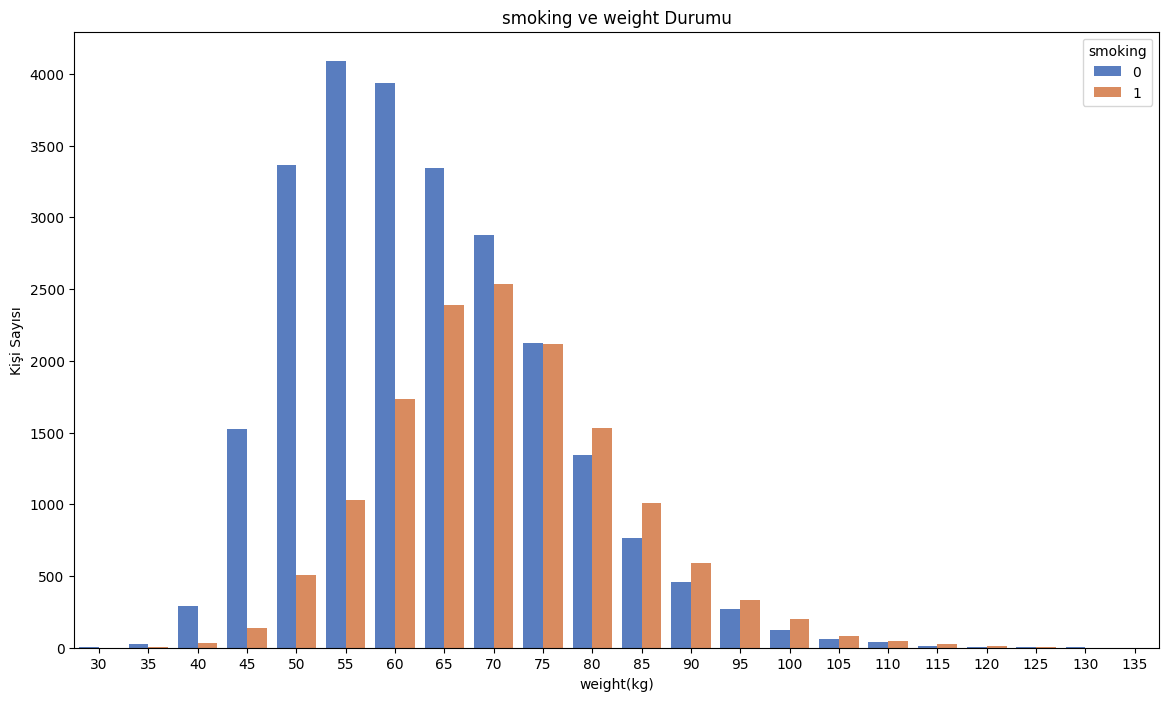

In [ ]:
plt.figure(figsize=(14, 8))
sns.countplot(data=train_veri, x='weight(kg)', hue='smoking', palette='muted')
plt.title('smoking ve weight Durumu')
plt.xlabel('weight(kg)')
plt.ylabel('Kişi Sayısı')
plt.show()

Kilosu yüksek olan kişiler daha fazla sigara içiyor gibi gözüküyor.


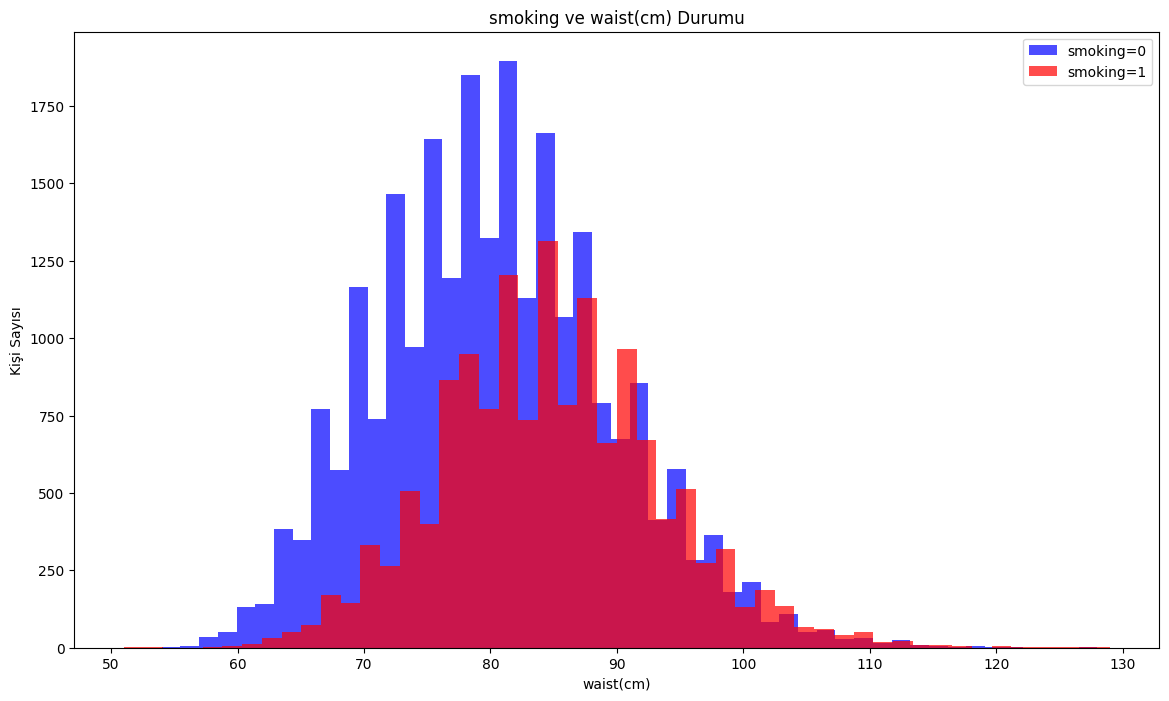

In [ ]:
plt.figure(figsize=(14, 8))
plt.hist(train_veri[train_veri['smoking'] == 0]['waist(cm)'], bins=50, color='blue', alpha=0.7, label='smoking=0')
plt.hist(train_veri[train_veri['smoking'] == 1]['waist(cm)'], bins=50, color='red', alpha=0.7, label='smoking=1')

plt.title('smoking ve waist(cm) Durumu')
plt.xlabel('waist(cm)')
plt.ylabel('Kişi Sayısı')
plt.legend()
plt.show()


80-90 cm bele sahip olanlar daha fazla sigara içiyor gibi görünüyor.


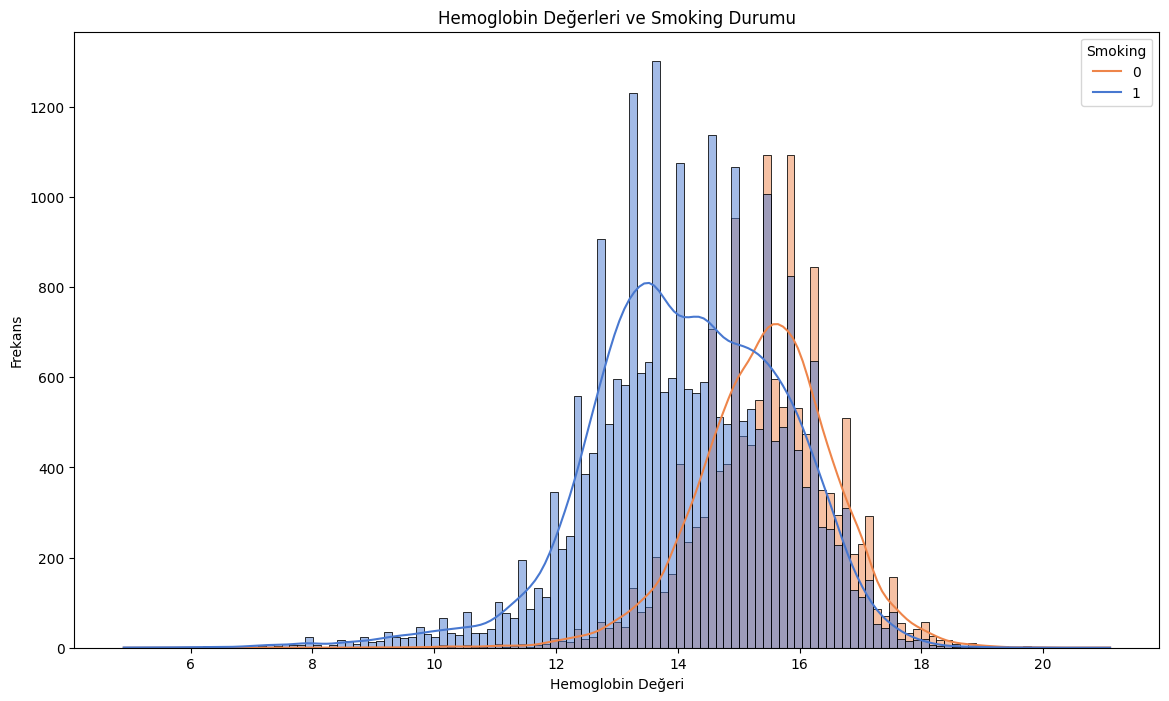

In [ ]:
plt.figure(figsize=(14, 8))
sns.histplot(data=train_veri, x='hemoglobin', hue='smoking', palette='muted', kde=True)
plt.title('Hemoglobin Değerleri ve Smoking Durumu')
plt.xlabel('Hemoglobin Değeri')
plt.ylabel('Frekans')
plt.legend(title='Smoking', labels=['0', '1'])
plt.show()


Hemoglobin, kemik iliğinde üretilen ve kırmızı kan hücrelerinde depo edilen demir açısından oldukça zengin bir proteindir. Yetişkin erkekler için: 13, 5 – 17, 5 gr/dL
Yetişkin kadınlar için: 12, 5 – 15, 5 gr/dL değer aralığında olmalıdır.



Hemoglobin değeri arttıkça sigara içenlerin arttığını görüyoruz.


<ipython-input-18-123e37ac8ff8>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train_veri, x='smoking', y='hemoglobin', palette='muted')


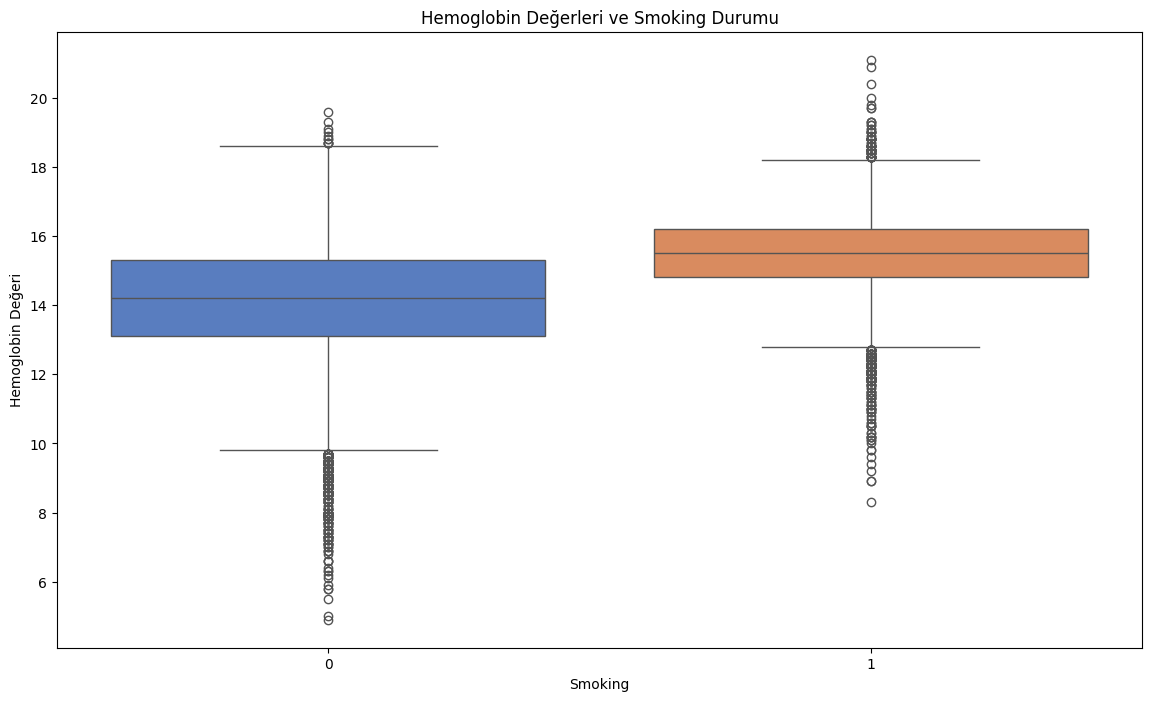

In [ ]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=train_veri, x='smoking', y='hemoglobin', palette='muted')
plt.title('Hemoglobin Değerleri ve Smoking Durumu')
plt.xlabel('Smoking')
plt.ylabel('Hemoglobin Değeri')
plt.xticks(ticks=[0, 1], labels=['0', '1'])
plt.show()


In [ ]:
hemoglobin_Q1 = train_veri['hemoglobin'].quantile(0.25)
hemoglobin_Q3 = train_veri['hemoglobin'].quantile(0.75)
hemoglobin_IQR = hemoglobin_Q3 - hemoglobin_Q1

hemoglobin_lower_bound = hemoglobin_Q1 - 1.5 * hemoglobin_IQR
hemoglobin_upper_bound = hemoglobin_Q3 + 1.5 * hemoglobin_IQR

hemoglobin_outliers = train_veri[(train_veri['hemoglobin'] < hemoglobin_lower_bound) | (train_veri['hemoglobin'] > hemoglobin_upper_bound)]

hemoglobin_outliers_count = len(hemoglobin_outliers)
print("Toplam Aykırı Değer Sayısı:", hemoglobin_outliers_count)

hemoglobin_min_outlier = hemoglobin_outliers.sort_values(by='hemoglobin').iloc[0]
print("En Küçük Aykırı Değer:")
print(hemoglobin_min_outlier)

hemoglobin_max_outlier = hemoglobin_outliers.sort_values(by='hemoglobin', ascending=False).iloc[0]
print("En Büyük Aykırı Değer:")
print(hemoglobin_max_outlier)

Toplam Aykırı Değer Sayısı: 484
En Küçük Aykırı Değer:
age                    40.000
height(cm)            165.000
weight(kg)             65.000
waist(cm)              74.000
eyesight(left)          1.200
eyesight(right)         1.000
hearing(left)           1.000
hearing(right)          1.000
systolic              114.000
relaxation             69.000
fasting blood sugar    96.000
Cholesterol           155.000
triglyceride           79.000
HDL                    46.000
LDL                    93.000
hemoglobin              4.900
Urine protein           1.000
serum creatinine        0.700
AST                    12.000
ALT                     9.000
Gtp                    10.000
dental caries           0.000
smoking                 0.000
Name: 16903, dtype: float64
En Büyük Aykırı Değer:
age                    40.000
height(cm)            170.000
weight(kg)            105.000
waist(cm)             118.000
eyesight(left)          1.500
eyesight(right)         1.200
hearing(left)           

<ipython-input-20-56cac6fa2920>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  smokers_data['age_group'] = pd.cut(smokers_data['age'], bins=[20, 30, 40, 50, 60, 70, 80], labels=['20-30', '30-40', '40-50', '50-60', '60-70', '70-80'])
<ipython-input-20-56cac6fa2920>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='age_group', data=smokers_data, palette='muted')


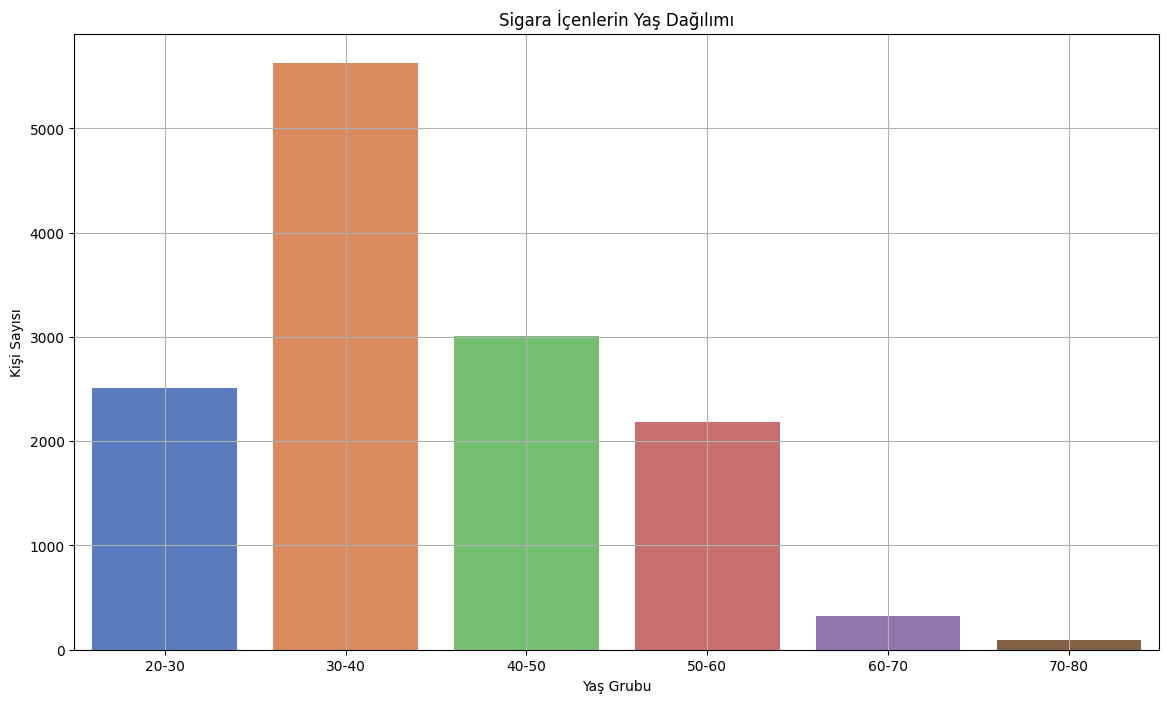

In [ ]:
smokers_data = train_veri[train_veri['smoking'] == 1]
smokers_data['age_group'] = pd.cut(smokers_data['age'], bins=[20, 30, 40, 50, 60, 70, 80], labels=['20-30', '30-40', '40-50', '50-60', '60-70', '70-80'])

plt.figure(figsize=(14, 8))
sns.countplot(x='age_group', data=smokers_data, palette='muted')
plt.xlabel('Yaş Grubu')
plt.ylabel('Kişi Sayısı')
plt.title('Sigara İçenlerin Yaş Dağılımı')
plt.grid(True)
plt.show()

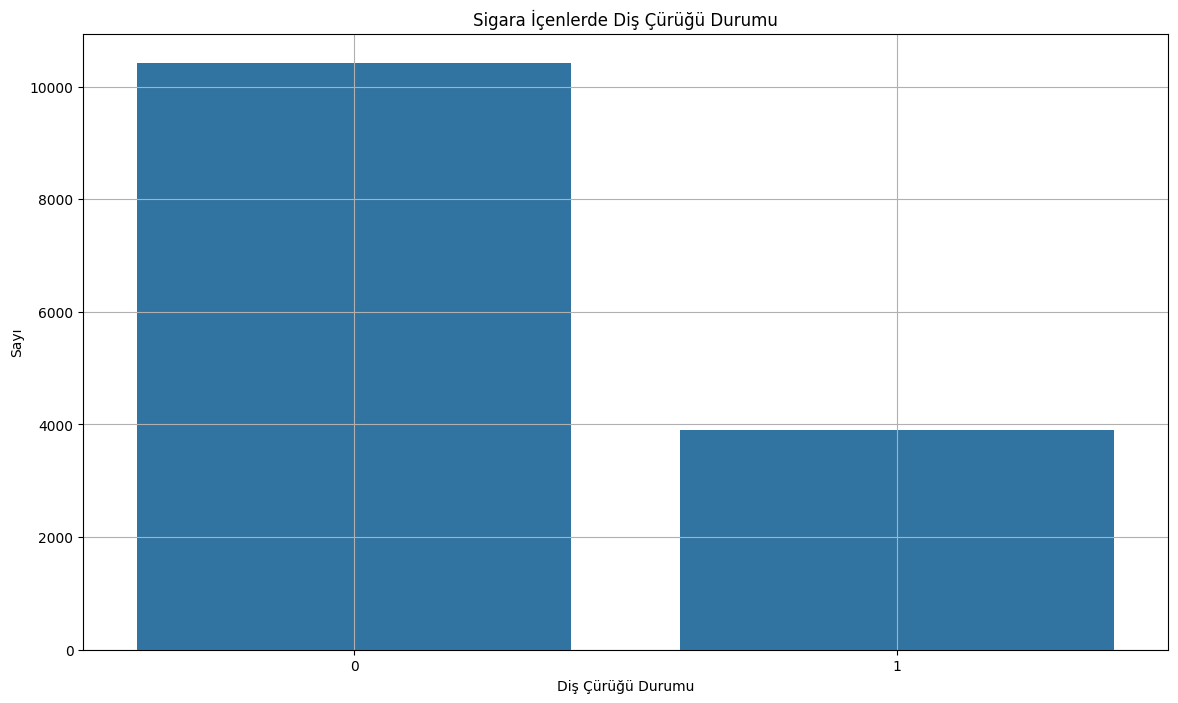

In [ ]:
plt.figure(figsize=(14, 8))
smokers = train_veri[train_veri['smoking'] == 1]
sns.countplot(x='dental caries', data=smokers)
plt.title('Sigara İçenlerde Diş Çürüğü Durumu')
plt.xlabel('Diş Çürüğü Durumu')
plt.ylabel('Sayı')
plt.xticks(ticks=[0, 1], labels=['0', '1'])
plt.grid(True)
plt.show()

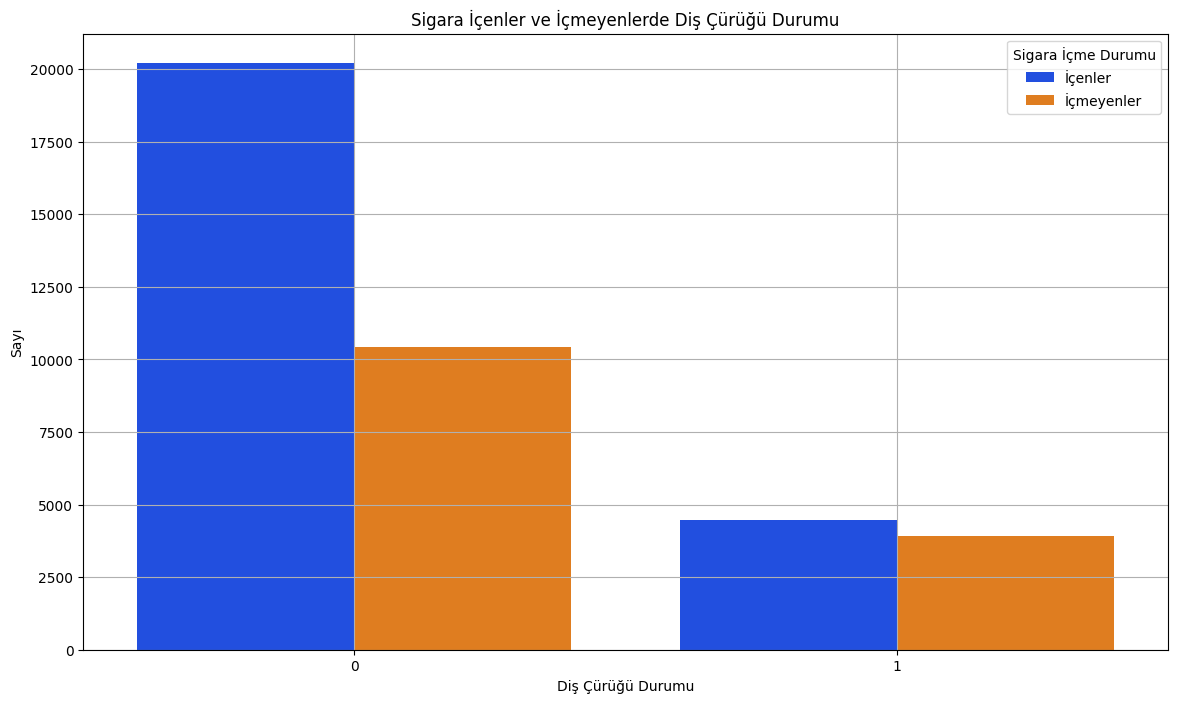

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))

sns.countplot(data=train_veri, x='dental caries', hue='smoking', palette='bright')

plt.title('Sigara İçenler ve İçmeyenlerde Diş Çürüğü Durumu')
plt.xlabel('Diş Çürüğü Durumu')
plt.ylabel('Sayı')
plt.xticks(ticks=[0, 1], labels=['0', '1'])
plt.legend(title='Sigara İçme Durumu', labels=['İçenler', 'İçmeyenler'])
plt.grid(True)
plt.show()



<ipython-input-52-2f3e00a5bf2d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_veri, x='dental caries', palette='muted')


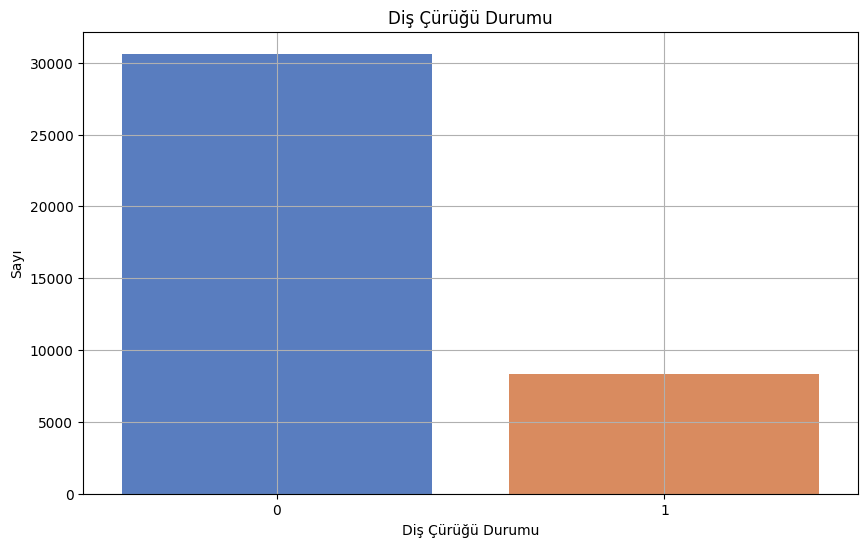

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

sns.countplot(data=train_veri, x='dental caries', palette='muted')

plt.title('Diş Çürüğü Durumu')
plt.xlabel('Diş Çürüğü Durumu')
plt.ylabel('Sayı')
plt.xticks(ticks=[0, 1], labels=['0', '1'])
plt.grid(True)
plt.show()


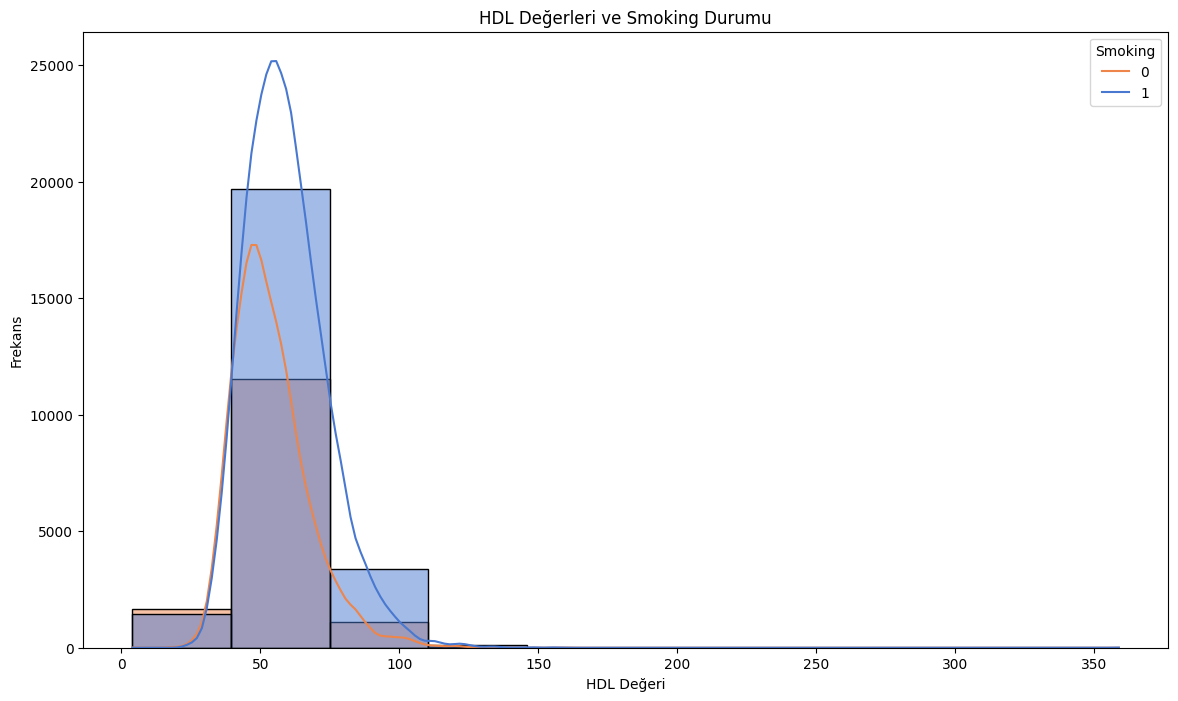

In [ ]:
plt.figure(figsize=(14, 8))
sns.histplot(data=train_veri, x='HDL', hue='smoking', kde=True, palette='muted', bins=10)
plt.title('HDL Değerleri ve Smoking Durumu')
plt.xlabel('HDL Değeri')
plt.ylabel('Frekans')
plt.legend(title='Smoking', labels=['0', '1'])
plt.show()


İyi kolesterol (HDL), dokulardaki kolesterolü toplayıp dışarı atılmasını sağlar.Kadınlarda 55 mg/dl, erkeklerde 45 mg/dl üzeri olmalıdır.  Genel olarak kötü kolesterolün üst sınırı 100 mg/dl olmalıdır.


<ipython-input-24-493a409f388e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train_veri, x='smoking', y='HDL', palette='muted')


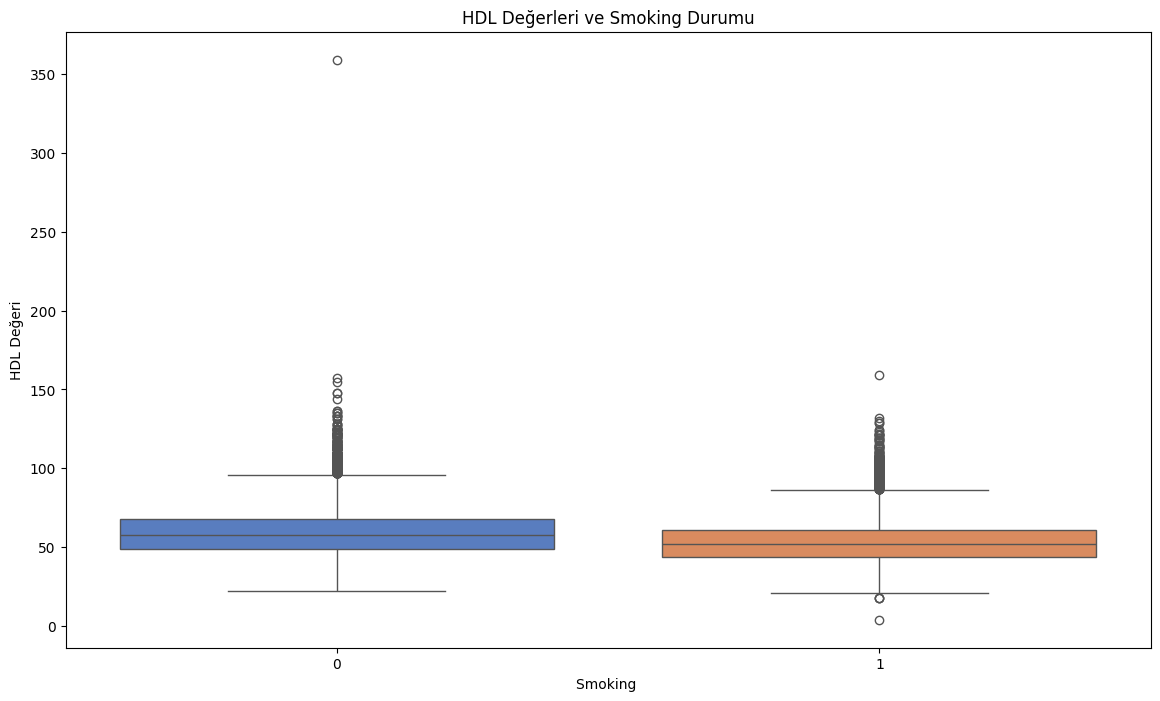

In [ ]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=train_veri, x='smoking', y='HDL', palette='muted')
plt.title('HDL Değerleri ve Smoking Durumu')
plt.xlabel('Smoking ')
plt.ylabel('HDL Değeri')
plt.xticks(ticks=[0, 1], labels=['0', '1'])
plt.show()


In [ ]:
HDL_Q1 = train_veri['HDL'].quantile(0.25)
HDL_Q3 = train_veri['HDL'].quantile(0.75)
HDL_IQR = HDL_Q3 - HDL_Q1

HDL_lower_bound = HDL_Q1 - 1.5 * HDL_IQR
HDL_upper_bound = HDL_Q3 + 1.5 * HDL_IQR

HDL_outliers = train_veri[(train_veri['HDL'] < HDL_lower_bound) | (train_veri['HDL'] > HDL_upper_bound)]


HDL_outliers_count = len(HDL_outliers)
print("Toplam Aykırı Değer Sayısı:", HDL_outliers_count)


Toplam Aykırı Değer Sayısı: 707


HDL değeri arttıkça sigara içenlerin sayısının azaldığını görüyoruz.

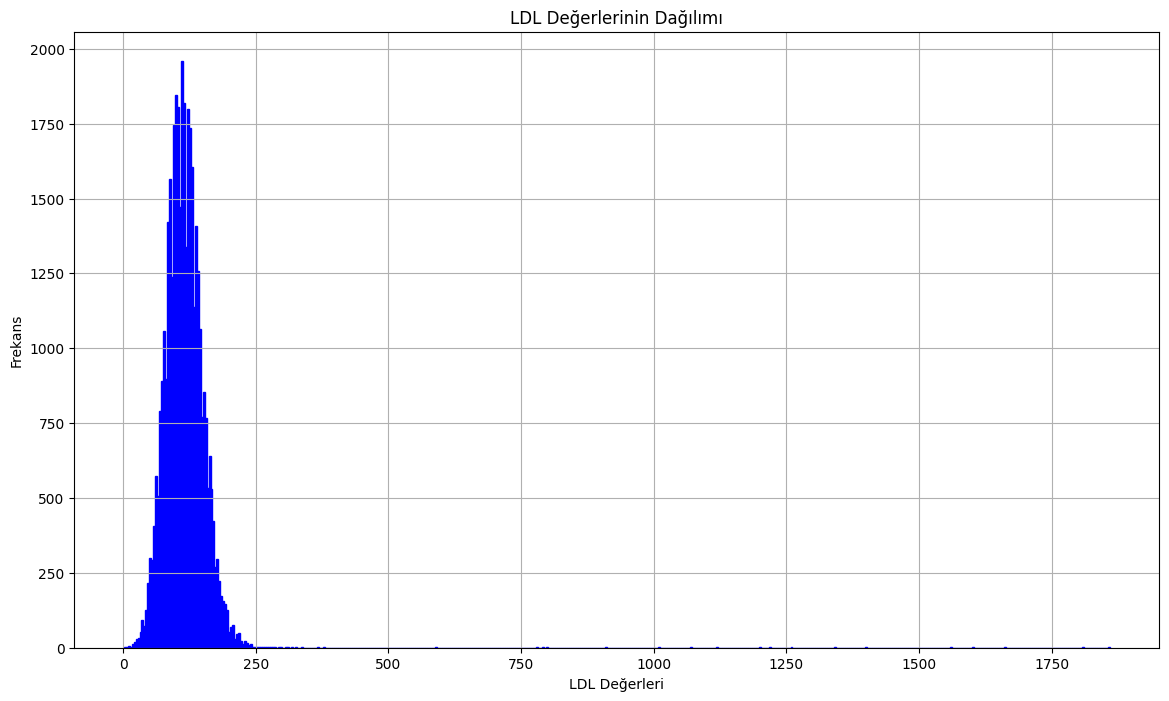

In [ ]:
plt.figure(figsize=(14, 8))
plt.hist(train_veri['LDL'], bins=500, color='blue', edgecolor='blue')
plt.title('LDL Değerlerinin Dağılımı')
plt.xlabel('LDL Değerleri')
plt.ylabel('Frekans')
plt.grid(True)
plt.show()

<ipython-input-27-3c18679c42bd>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train_veri, x='smoking', y='LDL', palette='muted')


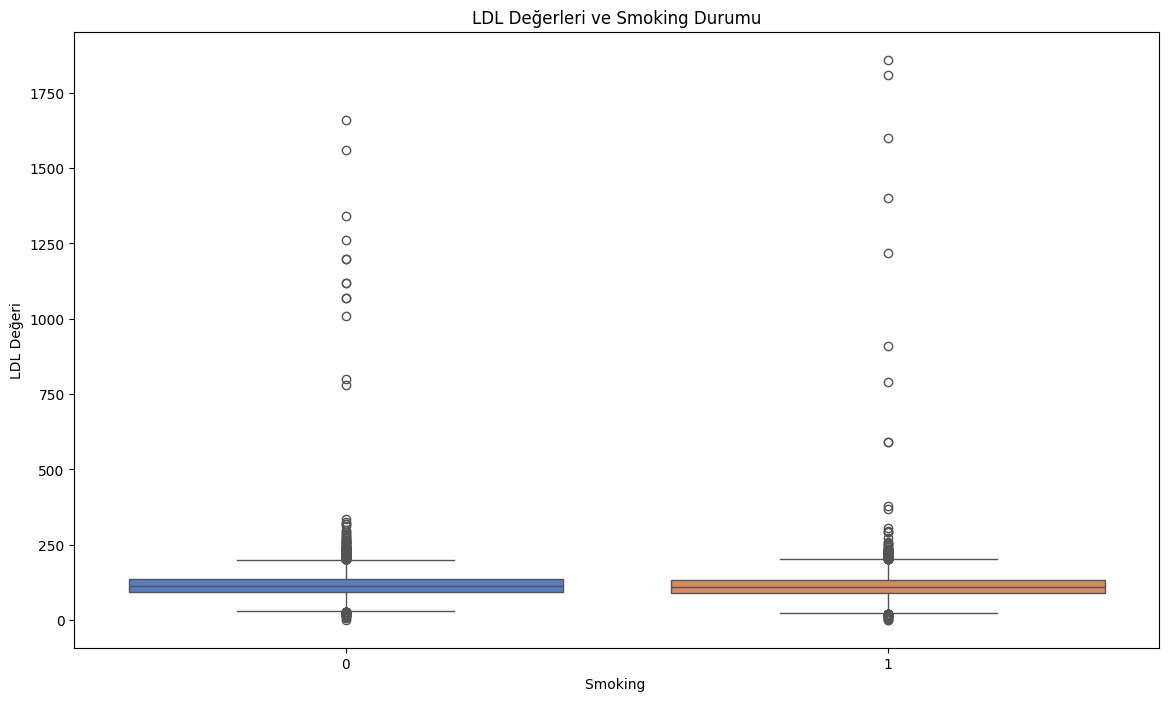

In [ ]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=train_veri, x='smoking', y='LDL', palette='muted')
plt.title('LDL Değerleri ve Smoking Durumu')
plt.xlabel('Smoking ')
plt.ylabel('LDL Değeri')
plt.xticks(ticks=[0, 1], labels=['0', '1'])
plt.show()


 Düşük yoğunluklu lipoprotein olarak bilinen bu kolesterol türü karaciğerde üretilen kolesterolün ve trigliseridlerin kan yoluyla taşınmasına yardımcı olur. Aynı zamanda LDL halk arasında kötü kolesterol olarak bilinir.LDL kolesterolün 130 mg/dL altında olması normal ve sağlıklı bir değerdir. 130-160 mg/dL arası riskli, 160 mg/dL ve üzeri değer ise yüksek olarak tanımlanır.


In [ ]:
LDL_Q1 = train_veri['LDL'].quantile(0.25)
LDL_Q3 = train_veri['LDL'].quantile(0.75)
LDL_IQR = LDL_Q3 - LDL_Q1

LDL_lower_bound = LDL_Q1 - 1.5 * LDL_IQR
LDL_upper_bound = LDL_Q3 + 1.5 * LDL_IQR

LDL_outliers = train_veri[(train_veri['LDL'] < LDL_lower_bound) | (train_veri['LDL'] > LDL_upper_bound)]

LDL_outliers_count = len(LDL_outliers)
print("Toplam Aykırı Değer Sayısı:", LDL_outliers_count)

min_outlier = LDL_outliers.sort_values(by='LDL').iloc[0]
print("En Küçük Aykırı Değer:")
print(min_outlier)

max_outlier = LDL_outliers.sort_values(by='LDL', ascending=False).iloc[0]
print("En Büyük Aykırı Değer:")
print(max_outlier)

Toplam Aykırı Değer Sayısı: 441
En Küçük Aykırı Değer:
age                    45.000
height(cm)            175.000
weight(kg)             75.000
waist(cm)              88.000
eyesight(left)          0.800
eyesight(right)         1.200
hearing(left)           1.000
hearing(right)          1.000
systolic              142.000
relaxation             92.000
fasting blood sugar   107.000
Cholesterol           121.000
triglyceride          370.000
HDL                    46.000
LDL                     1.000
hemoglobin             16.400
Urine protein           1.000
serum creatinine        1.100
AST                    20.000
ALT                    31.000
Gtp                    93.000
dental caries           0.000
smoking                 1.000
Name: 30717, dtype: float64
En Büyük Aykırı Değer:
age                     55.000
height(cm)             160.000
weight(kg)              50.000
waist(cm)               69.800
eyesight(left)           0.700
eyesight(right)          0.700
hearing(left)     

In [ ]:
train_veri.shape

(38984, 23)

In [ ]:
LDL_outlier_indexes = LDL_outliers.index

train_veri_cleaned = train_veri.drop(LDL_outlier_indexes)

print("Temizlenmiş Veri Seti Boyutu:", train_veri_cleaned.shape)


Temizlenmiş Veri Seti Boyutu: (38543, 23)


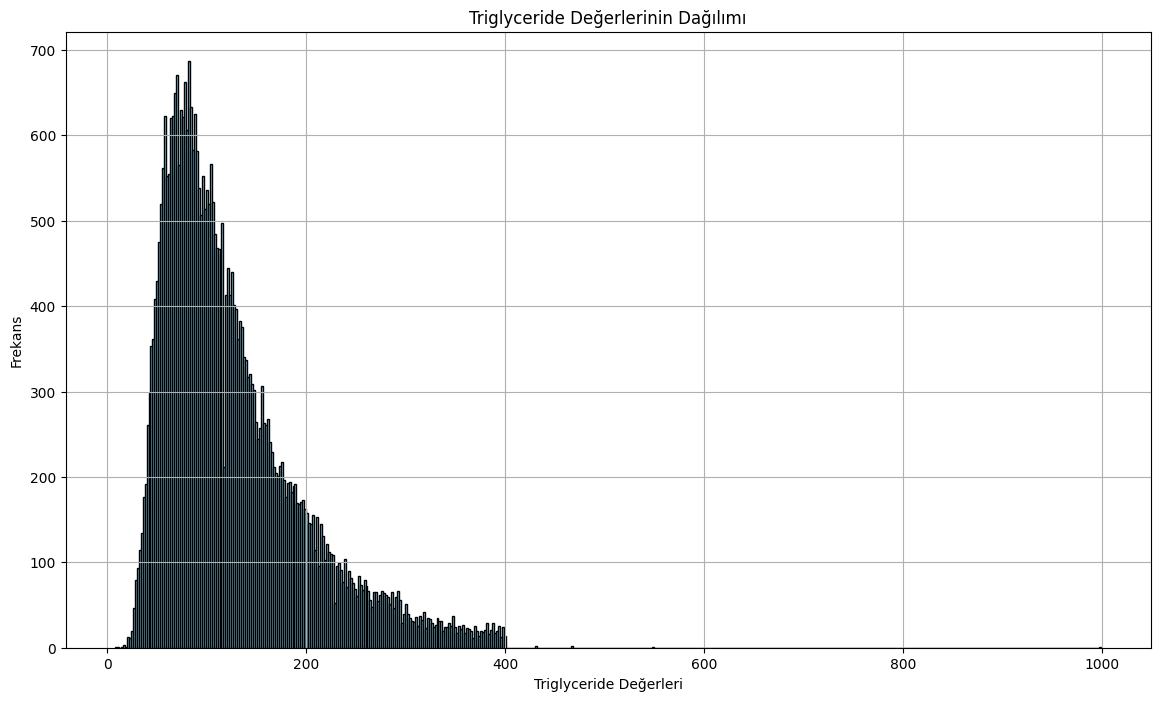

In [ ]:
plt.figure(figsize=(14, 8))
plt.hist(train_veri_cleaned['triglyceride'], bins=500, color='skyblue', edgecolor='black')
plt.title('Triglyceride Değerlerinin Dağılımı')
plt.xlabel('Triglyceride Değerleri')
plt.ylabel('Frekans')
plt.grid(True)
plt.show()


Trigliserid kanda bulunan bir lipid (yağ) türüdür.sağlıklı bir yetişkin bireyde olması gereken kan trigliserid düzeyi 150 mg/dL'nin altıdır. 150-199 mg/dL aralığındaki değerler sınırda yüksek, 200-499 mg/dL aralığındaki değerler yüksek, 500 mg/dL'nin üzeri ise çok yüksek trigliserid seviyelerini işaret eder.

<ipython-input-32-c1c798a4e141>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train_veri_cleaned['Gtp'], palette='Set3')


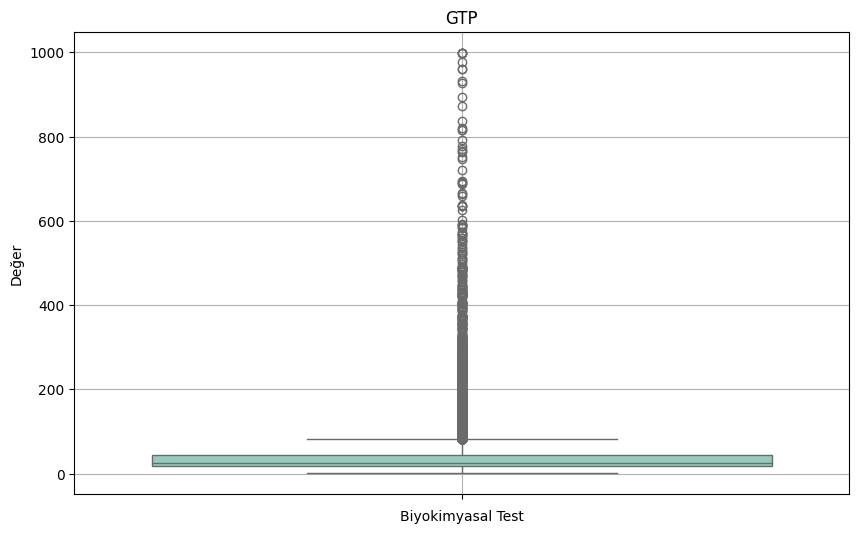

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=train_veri_cleaned['Gtp'], palette='Set3')
plt.title('GTP')
plt.xlabel('Biyokimyasal Test')
plt.ylabel('Değer')
plt.grid(True)
plt.show()

In [ ]:
Gtp_Q1 = train_veri_cleaned['Gtp'].quantile(0.25)
Gtp_Q3 = train_veri_cleaned['Gtp'].quantile(0.75)
Gtp_IQR = Gtp_Q3 - Gtp_Q1

Gtp_lower_bound = Gtp_Q1 - 1.5 * Gtp_IQR
Gtp_upper_bound = Gtp_Q3 + 1.5 * Gtp_IQR

Gtp_outliers = train_veri_cleaned[(train_veri_cleaned['Gtp'] < Gtp_lower_bound) | (train_veri_cleaned['Gtp'] > Gtp_upper_bound)]

Gtp_outliers_count = len(Gtp_outliers)
print("Toplam Aykırı Değer Sayısı:", Gtp_outliers_count)

min_outlier = Gtp_outliers.sort_values(by='Gtp').iloc[0]
print("En Küçük Aykırı Değer:")
print(min_outlier)

max_outlier = Gtp_outliers.sort_values(by='Gtp', ascending=False).iloc[0]
print("En Büyük Aykırı Değer:")
print(max_outlier)

Toplam Aykırı Değer Sayısı: 3473
En Küçük Aykırı Değer:
age                    45.000
height(cm)            165.000
weight(kg)             80.000
waist(cm)              86.400
eyesight(left)          1.000
eyesight(right)         1.000
hearing(left)           1.000
hearing(right)          1.000
systolic              130.000
relaxation             88.000
fasting blood sugar    83.000
Cholesterol           212.000
triglyceride          190.000
HDL                    45.000
LDL                   129.000
hemoglobin             15.600
Urine protein           1.000
serum creatinine        1.100
AST                    24.000
ALT                    34.000
Gtp                    83.000
dental caries           0.000
smoking                 0.000
Name: 32544, dtype: float64
En Büyük Aykırı Değer:
age                    60.000
height(cm)            170.000
weight(kg)             50.000
waist(cm)              77.000
eyesight(left)          0.900
eyesight(right)         0.900
hearing(left)          

In [ ]:
Gtp_outlier_indexes = Gtp_outliers.index

train_veri_cleaned = train_veri_cleaned.drop(Gtp_outlier_indexes)

print("Temizlenmiş Veri Seti Boyutu:", train_veri_cleaned.shape)


Temizlenmiş Veri Seti Boyutu: (35070, 23)


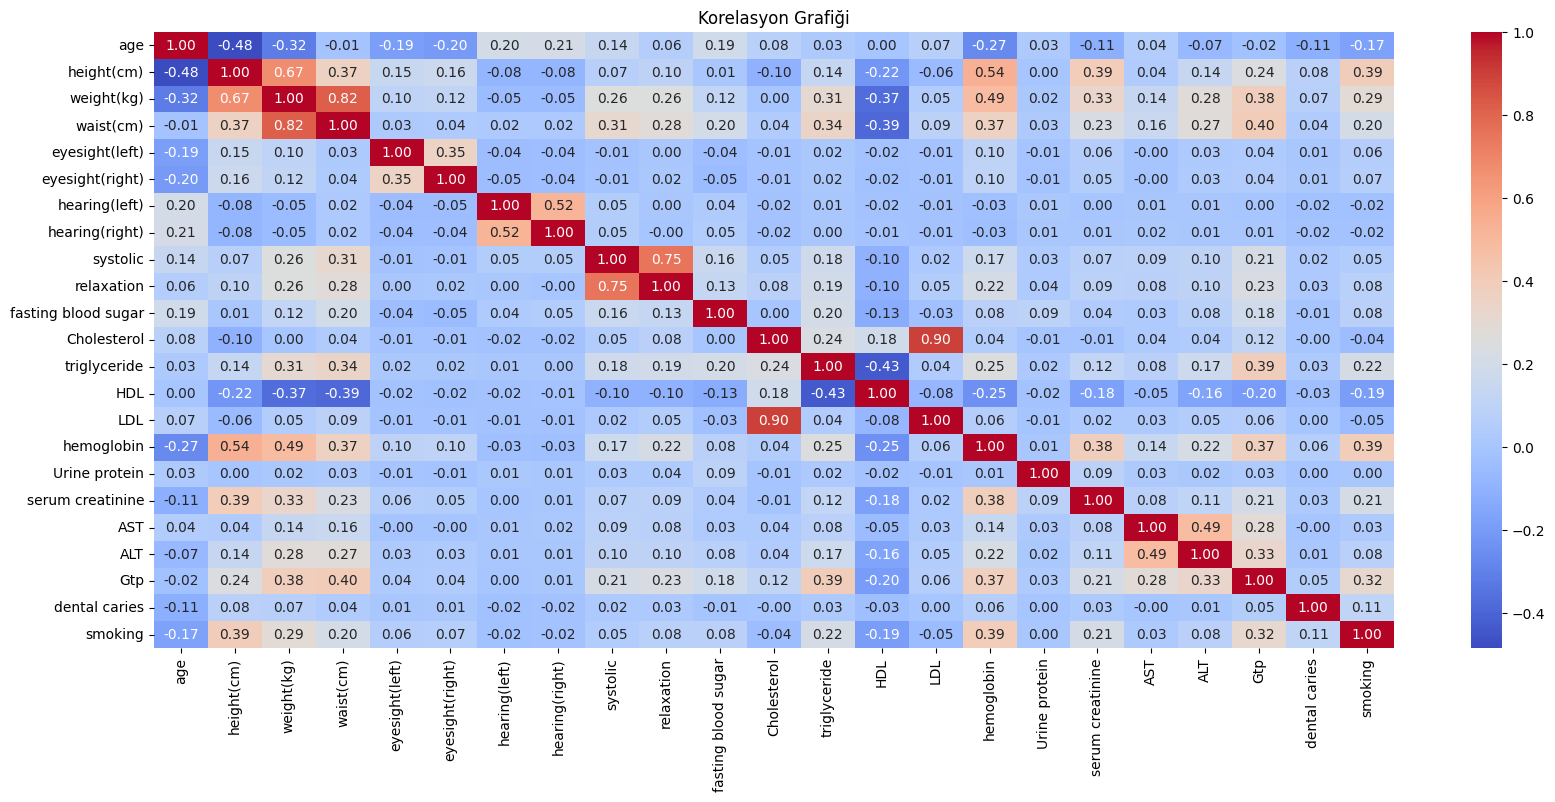

In [ ]:
plt.figure(figsize=(20, 8))
sns.heatmap(train_veri_cleaned.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korelasyon Grafiği')
plt.show()

In [ ]:
"""
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

normalized_train_data = scaler.fit_transform(train_veri_cleaned)

normalized_train_df = pd.DataFrame(normalized_train_data, columns=train_veri_cleaned.columns)

print(normalized_train_df.head())
"""

'\nfrom sklearn.preprocessing import MinMaxScaler\n\nscaler = MinMaxScaler()\n\nnormalized_train_data = scaler.fit_transform(train_veri_cleaned)\n\nnormalized_train_df = pd.DataFrame(normalized_train_data, columns=train_veri_cleaned.columns)\n\nprint(normalized_train_df.head())\n'

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

scaler = MinMaxScaler()

train_veri_normalized = scaler.fit_transform(train_veri)

train_veri_normalized_df = pd.DataFrame(train_veri_normalized, columns=train_veri.columns)


In [ ]:
from sklearn.model_selection import train_test_split

X = train_veri_normalized_df.drop(columns=["smoking", "eyesight(left)", "eyesight(right)", "hearing(left)", "hearing(right)"])
y = train_veri_normalized_df["smoking"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
#Aykırı değerlerin silinmemiş hali

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

log_reg = LogisticRegression()

log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

logistic_precision = precision_score(y_test, y_pred)
logistic_recall = recall_score(y_test, y_pred)
logistic_f1 = f1_score(y_test, y_pred)
logistic_accuracy = accuracy_score(y_test, y_pred)

print("Logistic Regression Precision:", logistic_precision)
print("Logistic Regression Recall:", logistic_recall)
print("Logistic Regression F1-score:", logistic_f1)
print("Logistic Regression Accuracy:", logistic_accuracy)


Logistic Regression Precision: 0.6296441141963238
Logistic Regression Recall: 0.5705173635719348
Logistic Regression F1-score: 0.5986242796058747
Logistic Regression Accuracy: 0.7230986276773118


In [ ]:
#Aykırı değerlerin silinmiş hali

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

X = train_veri_cleaned[['age', 'height(cm)', 'weight(kg)', 'waist(cm)',
                 'systolic', 'relaxation', 'fasting blood sugar',
                'Cholesterol', 'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'Urine protein',
                'serum creatinine', 'AST', 'ALT', 'Gtp', 'dental caries']]

y = train_veri_cleaned['smoking']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=4000, solver='lbfgs')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Modelin doğruluğu:", accuracy)



Modelin doğruluğu: 0.7345309381237525


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

randomf_model = RandomForestClassifier(random_state=42)

randomf_model.fit(X_train, y_train)
y_pred_rf = randomf_model.predict(X_test)

randomf_precision = precision_score(y_test, y_pred_rf)
randomf_recall = recall_score(y_test, y_pred_rf)
randomf_f1 = f1_score(y_test, y_pred_rf)
randomf_accuracy = accuracy_score(y_test, y_pred_rf)

print("Random Forest Precision:", randomf_precision)
print("Random Forest Recall:", randomf_recall)
print("Random Forest F1-score:", randomf_f1)
print("Random Forest Accuracy:", randomf_accuracy)

Random Forest Precision: 0.7176050044682752
Random Forest Recall: 0.6816638370118846
Random Forest F1-score: 0.6991728341314758
Random Forest Accuracy: 0.802965497576276


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

svm_model = SVC()

svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

svm_precision = precision_score(y_test, y_pred_svm)
svm_recall = recall_score(y_test, y_pred_svm)
svm_f1 = f1_score(y_test, y_pred_svm)
svm_accuracy = accuracy_score(y_test, y_pred_svm)

print("SVM Precision:", svm_precision)
print("SVM Recall:", svm_recall)
print("SVM F1-score:", svm_f1)
print("SVM Accuracy:", svm_accuracy)

SVM Precision: 0.6352601156069364
SVM Recall: 0.4664685908319185
SVM F1-score: 0.5379344101811061
SVM Accuracy: 0.7308240661534074


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

n_neighbors_list = [3, 5, 7, 9]

for n_neighbors in n_neighbors_list:
    knn_model = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn_model.fit(X_train, y_train)
    y_pred_knn = knn_model.predict(X_test)

    knn_precision = precision_score(y_test, y_pred_knn)
    knn_recall = recall_score(y_test, y_pred_knn)
    knn_f1 = f1_score(y_test, y_pred_knn)
    knn_accuracy = accuracy_score(y_test, y_pred_knn)

    print(f"\nKomşu Sayısı: {n_neighbors}")
    print("KNN Precision:", knn_precision)
    print("KNN Recall:", knn_recall)
    print("KNN F1-score:", knn_f1)
    print("KNN Accuracy:", knn_accuracy)



Komşu Sayısı: 3
KNN Precision: 0.5641476274165202
KNN Recall: 0.5449915110356537
KNN F1-score: 0.5544041450777202
KNN Accuracy: 0.7057313943541489

Komşu Sayısı: 5
KNN Precision: 0.5728066146072577
KNN Recall: 0.5292869269949066
KNN F1-score: 0.5501875137877785
KNN Accuracy: 0.7092956943256344

Komşu Sayısı: 7
KNN Precision: 0.5842911877394636
KNN Recall: 0.5178268251273345
KNN F1-score: 0.549054905490549
KNN Accuracy: 0.7142857142857143

Komşu Sayısı: 9
KNN Precision: 0.5868820362212432
KNN Recall: 0.5089134125636672
KNN F1-score: 0.5451238917935894
KNN Accuracy: 0.7147134302822925


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

knn_model = KNeighborsClassifier(n_neighbors=7)

knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

knn_precision = precision_score(y_test, y_pred_knn)
knn_recall = recall_score(y_test, y_pred_knn)
knn_f1 = f1_score(y_test, y_pred_knn)
knn_accuracy = accuracy_score(y_test, y_pred_knn)

print("KNN Precision:", knn_precision)
print("KNN Recall:", knn_recall)
print("KNN F1-score:", knn_f1)
print("KNN Accuracy:", knn_accuracy)

KNN Precision: 0.5842911877394636
KNN Recall: 0.5178268251273345
KNN F1-score: 0.549054905490549
KNN Accuracy: 0.7142857142857143


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

nb_model = GaussianNB()

nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

nb_precision = precision_score(y_test, y_pred_nb)
nb_recall = recall_score(y_test, y_pred_nb)
nb_f1 = f1_score(y_test, y_pred_nb)
nb_accuracy = accuracy_score(y_test, y_pred_nb)

print("Naive Bayes Precision:", nb_precision)
print("Naive Bayes Recall:", nb_recall)
print("Naive Bayes F1-score:", nb_f1)
print("Naive Bayes Accuracy:", nb_accuracy)

Naive Bayes Precision: 0.5515171723907969
Naive Bayes Recall: 0.702037351443124
Naive Bayes F1-score: 0.6177404295051353
Naive Bayes Accuracy: 0.7081551183347591


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

gb_model = GradientBoostingClassifier()

gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

gb_precision = precision_score(y_test, y_pred_gb)
gb_recall = recall_score(y_test, y_pred_gb)
gb_f1 = f1_score(y_test, y_pred_gb)
gb_accuracy = accuracy_score(y_test, y_pred_gb)

print("Gradient Boosting Precision:", gb_precision)
print("Gradient Boosting Recall:", gb_recall)
print("Gradient Boosting F1-score:", gb_f1)
print("Gradient Boosting Accuracy:", gb_accuracy)

Gradient Boosting Precision: 0.6329833770778652
Gradient Boosting Recall: 0.6141765704584041
Gradient Boosting F1-score: 0.6234381732012063
Gradient Boosting Accuracy: 0.7507841459937268
